# Exact diagonalization

Quantax wraps [QuSpin](https://github.com/QuSpin/QuSpin) to provide a simple interface
of exact diagonalization (ED). In this tutorial, we show how to perform ED to obtain eigenstates
of the Heisenberg model in Quantax. You will find it very convenient and fast!

Reference:

[P. Weinberg and M. Bukov, QuSpin: a Python package for dynamics and exact diagonalisation of quantum many body systems part I: spin chains, SciPost Phys. 2, 003 (2017).](https://scipost.org/SciPostPhys.2.1.003)

## System definition

First, we define the lattice and Hilbert space of the problem, encoded in {py:class}`~quantax.sites.Lattice`. We will use a small 4x4 lattice with periodic boundary condition (PBC). The Heisenberg model has a conserved number of up and down spins, which should also be specified.

(1, 4, 4)


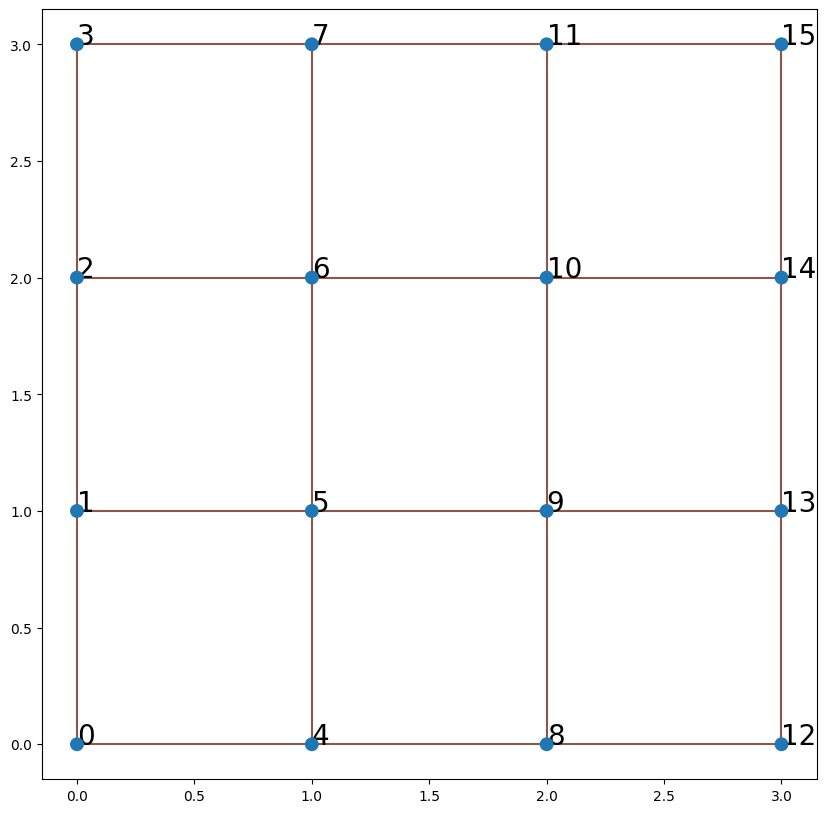

In [1]:
import quantax as qtx
import matplotlib.pyplot as plt

# 4x4 square lattice, PBC by default, 8 spin-up, 8 spin-down
lattice = qtx.sites.Square(4, Nparticle=(8, 8))

print(lattice.shape)  # output: (1, 4, 4), 1 spin per unit cell, and Lx = Ly = 4
lattice.plot()
plt.show()

Now we define the Heisenberg Hamiltonian

$$
H = \sum_{\left< i,j \right>} (\sigma_i^z \sigma_j^z + \sigma_i^x \sigma_j^x + \sigma_i^y \sigma_j^y)
= \sum_{\left< i,j \right>} (\sigma_i^z \sigma_j^z + 2\sigma_i^+ \sigma_j^- + 2\sigma_i^- \sigma_j^+)
$$

We use the last equation to avoid complex numbers in the Hamiltonian. It's implemented an instance of {py:class}`~quantax.operator.Operator` in Quantax.

In [2]:
# Define Heisenberg Hamiltonian

# Method 1: Using built-in operator
H = qtx.operator.Heisenberg()


# Method2: Customized operator
from quantax.operator import sigma_z, sigma_p, sigma_m

H = 0

Lx, Ly = lattice.shape[1:]
for x in range(Lx):
    for y in range(Ly):
        # Periodic boundary taken into account automatically
        H += sigma_z(x, y) * sigma_z(x + 1, y) + sigma_z(x, y) * sigma_z(x, y + 1)
        H += 2 * (sigma_m(x, y) * sigma_p(x + 1, y) + sigma_p(x, y) * sigma_m(x + 1, y))
        H += 2 * (sigma_m(x, y) * sigma_p(x, y + 1) + sigma_p(x, y) * sigma_m(x, y + 1))

print(H)

+4.0 Sᶻ₀ Sᶻ₄ +4.0 Sᶻ₀ Sᶻ₁ +4.0 Sᶻ₁ Sᶻ₅ +4.0 Sᶻ₁ Sᶻ₂ +4.0 Sᶻ₂ Sᶻ₆ +4.0 Sᶻ₂ Sᶻ₃ +4.0 Sᶻ₃ Sᶻ₇ +4.0 Sᶻ₃ Sᶻ₀ +4.0 Sᶻ₄ Sᶻ₈ +4.0 Sᶻ₄ Sᶻ₅ +4.0 Sᶻ₅ Sᶻ₉ +4.0 Sᶻ₅ Sᶻ₆ +4.0 Sᶻ₆ Sᶻ₁₀ +4.0 Sᶻ₆ Sᶻ₇ +4.0 Sᶻ₇ Sᶻ₁₁ +4.0 Sᶻ₇ Sᶻ₄ +4.0 Sᶻ₈ Sᶻ₁₂ +4.0 Sᶻ₈ Sᶻ₉ +4.0 Sᶻ₉ Sᶻ₁₃ +4.0 Sᶻ₉ Sᶻ₁₀ +4.0 Sᶻ₁₀ Sᶻ₁₄ +4.0 Sᶻ₁₀ Sᶻ₁₁ +4.0 Sᶻ₁₁ Sᶻ₁₅ +4.0 Sᶻ₁₁ Sᶻ₈ +4.0 Sᶻ₁₂ Sᶻ₀ +4.0 Sᶻ₁₂ Sᶻ₁₃ +4.0 Sᶻ₁₃ Sᶻ₁ +4.0 Sᶻ₁₃ Sᶻ₁₄ +4.0 Sᶻ₁₄ Sᶻ₂ +4.0 Sᶻ₁₄ Sᶻ₁₅ +4.0 Sᶻ₁₅ Sᶻ₃ +4.0 Sᶻ₁₅ Sᶻ₁₂ +2.0 S⁻₀ S⁺₄ +2.0 S⁻₀ S⁺₁ +2.0 S⁻₁ S⁺₅ +2.0 S⁻₁ S⁺₂ +2.0 S⁻₂ S⁺₆ +2.0 S⁻₂ S⁺₃ +2.0 S⁻₃ S⁺₇ +2.0 S⁻₃ S⁺₀ +2.0 S⁻₄ S⁺₈ +2.0 S⁻₄ S⁺₅ +2.0 S⁻₅ S⁺₉ +2.0 S⁻₅ S⁺₆ +2.0 S⁻₆ S⁺₁₀ +2.0 S⁻₆ S⁺₇ +2.0 S⁻₇ S⁺₁₁ +2.0 S⁻₇ S⁺₄ +2.0 S⁻₈ S⁺₁₂ +2.0 S⁻₈ S⁺₉ +2.0 S⁻₉ S⁺₁₃ +2.0 S⁻₉ S⁺₁₀ +2.0 S⁻₁₀ S⁺₁₄ +2.0 S⁻₁₀ S⁺₁₁ +2.0 S⁻₁₁ S⁺₁₅ +2.0 S⁻₁₁ S⁺₈ +2.0 S⁻₁₂ S⁺₀ +2.0 S⁻₁₂ S⁺₁₃ +2.0 S⁻₁₃ S⁺₁ +2.0 S⁻₁₃ S⁺₁₄ +2.0 S⁻₁₄ S⁺₂ +2.0 S⁻₁₄ S⁺₁₅ +2.0 S⁻₁₅ S⁺₃ +2.0 S⁻₁₅ S⁺₁₂ +2.0 S⁺₀ S⁻₄ +2.0 S⁺₀ S⁻₁ +2.0 S⁺₁ S⁻₅ +2.0 S⁺₁ S⁻₂ +2.0 S⁺₂ S⁻₆ +2.0 S⁺₂ S⁻₃ +2.0 S⁺₃ S⁻₇ +2.0 S⁺₃ S⁻₀ +2.0 S⁺₄ S⁻₈ +2.

## Direct ED

Then we use ED to obtain 2 lowest eigenstates of H, which is internally performed by QuSpin.
In Quantax, we implement {py:class}`~quantax.state.DenseState` to process dense wavefunctions.

In [3]:
E, wf = H.diagonalize(k=2)

dense0 = qtx.state.DenseState(wf[:, 0])  # Ground state
dense1 = qtx.state.DenseState(wf[:, 1])  # First excited state

One can easily compute the wavefunction amplitude $\psi(s) = \left<s|\psi\right>$ from
{py:class}`~quantax.state.DenseState`.

In [4]:
s = qtx.utils.rand_states()
print("s =", s)  # +1/-1 represents spin-up/down
print("<s|psi0> =", dense0(s))

s = [ 1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1  1]
<s|psi0> = [0.00651428]


There are convenient expressions to compute $\left<\psi|\phi\right>$ and $\left<\psi|H|\psi\right>$.

In [5]:
print("<psi0|psi0> =", dense0 @ dense0)  # output: 1, normalization
print("<psi0|psi1> =", dense0 @ dense1)  # output: 0, orthogonality

print("<psi0|H|psi0> =", dense0 @ H @ dense0, "\t", "E0 =", E[0])
print("<psi1|H|psi1> =", dense1 @ H @ dense1, "\t", "E1 =", E[1])

<psi0|psi0> = 1.0000000000000016
<psi0|psi1> = -3.391384395534658e-16
<psi0|H|psi0> = -44.91393283371552 	 E0 = -44.913932833715506
<psi1|H|psi1> = -42.599539490653925 	 E1 = -42.599539490653896


One can also measure customized observables from the ED results. Here we show the spin-spin correlation as an example. The spin-spin correlation is defined as

$$
C_{ij} = \left< \mathbf{S}_i \cdot \mathbf{S}_j \right>
= \frac{1}{4} \left< \sigma_i^z \sigma_j^z + 2\sigma_i^+ \sigma_j^- + 2\sigma_i^- \sigma_j^+ \right>
$$

In [6]:
def correlation(i, j):
    # sigma_z(x, y) and sigma_z(i) with i=4x+y are equivalent in 4x4 lattice
    return (
        sigma_z(i) * sigma_z(j)
        + 2 * sigma_p(i) * sigma_m(j)
        + 2 * sigma_m(i) * sigma_p(j)
    ) / 4

C1 = correlation(0, 1)
C2 = correlation(0, 2)

print("<C01> =", dense0 @ C1 @ dense0)
print("<C02> =", dense0 @ C2 @ dense0)

<C01> = -0.3508901002634025
<C02> = 0.21376528539942638


## ED with symmetries

A common trick in ED is reducing the Hilbert space dimension using {py:class}`~quantax.symmetry.Symmetry`.
In the square lattice Heisenberg model, the system is invariant under translation,
rotation, mirror flip, and spin flip (time reversal symmetry).

In [ ]:
from quantax.symmetry import Trans2D, C4v, SpinInverse

# The symmetry superposition can be performed by "+"
symm = Trans2D() + C4v() + SpinInverse()

# We will get "GeneralBasisWarning" from QuSpin, but it doesn't matter here
E0_symm, wf0_symm = H.diagonalize(symm)
dense0_symm = qtx.state.DenseState(wf0_symm, symm)

The wavefunction is identical to the unsymmetrized one up to a possible extra minus sign,
and the measurement gives the same result.

In [9]:
print("E0 =", E0_symm)
print("Check overlap:", dense0_symm @ dense0)
print("<s|psi0> =", dense0_symm(s))
print("<psi0|H|psi0> =", dense0_symm @ H @ dense0_symm)

E0 = [-44.91393283]
Check overlap: -1.000000000000001
<s|psi0> = [-0.00651428]
<psi0|H|psi0> = -44.91393283371548


However, be careful that some operators like the spin-spin correlation $C_{ij}$ are ill-defined in the symmetrized Hilbert space. One cannot directly measure them in this case.

In [10]:
print("Wrong <C01>:", dense0_symm @ C1 @ dense0_symm)
print("Wrong <C02>:", dense0_symm @ C2 @ dense0_symm)

Wrong <C01>: 0.1507402593085035
Wrong <C02>: 0.23714288042475282


One can obtain the excited state as the ground state in a specific symmetry sector. Here we compute the triplet excitation energy with -1 eigenvalue under spin inversion.

In [10]:
spin_inv = SpinInverse(-1)

E1_symm, wf1_symm = H.diagonalize(spin_inv)
print("Excited state energy =", E1_symm)  # It's the first excited state shown above

dense1_symm = qtx.state.DenseState(wf1_symm, spin_inv)
print("Check overlap:", dense1_symm @ dense1)

Excited state energy = [-42.59953949]
Check overlap: -1.0000000000000004
